In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Esse notebook tem o objetivo de implementar o TSMOM do  Moskowitz. Portanto utilizarei uma parte do dataset, para facilitar a implementação. No dataset estão presentes apenas os preços de fechamento, e apenas de 1999 a 2019.

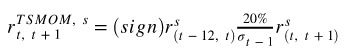
Em resumo a equação final do TSMOM do Moskowitz tem 3 partes: O cálculo do momento do ativo, A poderação do peso no portifolio, e a predição do retorno do ativo

Cálculo do Momento: Calcula-se o retorno do periodo desejado (no caso da image os ultimos 12 meses), e com o retorno e mãos retira-se o sinal, tomando assim uma posição de vendido ou comprado.

O peso no portifolio: Dependendo do periodo utiliza-se uma das seguintes ponderações: 20,40,60,120. E divide-se pelo desvio padrão da carteira
Um possivel melhora no algoritmo é utilizar o desvio padrão de cada ativo em suas respectivas ponderações

Predição do retorno: --

In [2]:
# Importação do csv previamente limpo
df = pd.read_csv ("close_clean_data.csv")
df.index = pd.to_datetime(df['date'], format='%Y-%m-%d')
df = df.drop('date', axis=1)

In [3]:
df.head()

,AN,BN,CC,CN,CT,DA,DX,EC,EN,ES,...,ZW,ZZ,DT,HS,LX,ND,NK,SP,UB,AX
date,,,,,,,,,,,,,,,,,,,,,
1999-06-21,42.81,143.90,2468.0,67.537,220.54,20.06,112.848,88.1480,3054.57,1464.26,...,4614.72,163.364,75.10,11237.36,5618.6,2999.78,16474.0,1464.92,82.26,7704.9
1999-06-22,43.12,143.72,2421.0,67.537,222.69,20.20,113.002,88.1247,2984.70,1452.69,...,4536.94,166.007,74.87,11138.79,5586.4,2931.16,16387.0,1453.39,82.11,7702.8
1999-06-23,43.39,142.89,2304.0,67.507,220.19,20.26,113.057,88.1060,3006.66,1445.15,...,4558.54,165.846,74.47,11119.07,5536.9,2952.72,16262.0,1445.85,81.88,7601.4
1999-06-24,43.42,143.63,2227.0,67.497,222.81,20.29,112.419,88.0781,2952.09,1434.93,...,4528.30,162.323,73.86,10914.04,5466.2,2899.13,16225.0,1435.62,81.59,7486.8
1999-06-25,43.64,143.52,2221.0,67.824,221.30,20.42,112.144,88.0781,2948.10,1430.89,...,4562.87,162.963,74.17,10921.93,5478.0,2894.88,16229.0,1431.52,81.66,7511.3


In [4]:
# daily data
returns_daily = df.pct_change().dropna()
vol_daily = 252*returns_daily.ewm(adjust=True, com=60,   
                                  min_periods=0).std().dropna()

#monthly data
returns_monthly = returns_daily.resample('BM').last().ffill()
vol_monthly = vol_daily.resample('BM').last().ffill()

In [7]:
def momentum (returns_monthly, vol_monthly,date, risk=0.4):
    
    m = returns_monthly / returns_monthly.shift(-12)  # momentum 12
    
    # long and short
    position = []
    for i in m.iloc[date-1]:
        if i > 0:
            position.append(1)
        else:
            position.append(-1)
        
    portfolio = position * ((risk / vol_monthly.iloc[date-2]))
    
    return 1 + np.dot(portfolio, returns_monthly.iloc[date])

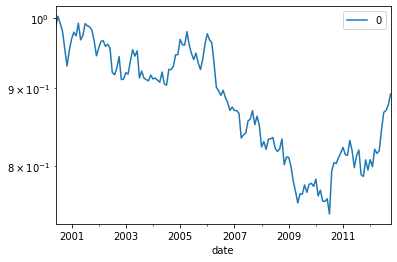

In [8]:
r = []
start = 12
end = 161
for i in range(start, end):
    r.append(momentum (returns_monthly, vol_monthly, date=i, risk=0.4))
    
r = pd.DataFrame(r)
r.index = returns_monthly.iloc[start:end].index
r.cumprod().plot()
plt.yscale('log')